# **Viewing classes in Directory**





In [14]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

#dir_example = "/content/drive/My Drive/Data"
dir_example = "./Data/"

classes = os.listdir(dir_example)
print(classes)

['Test', 'README.md', 'Train']


In [15]:
dir_example = "./Data/Train"

train_classes = os.listdir(dir_example)
print(train_classes)

['glass', 'plastic', 'cardboard', 'metal', 'paper', 'trash']


# **Visualizing Images in Dataset from each class**

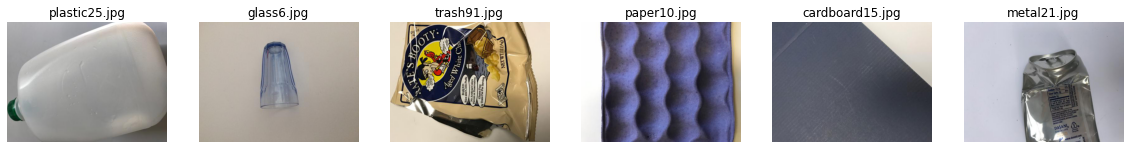

In [25]:
dir_with_examples = './visualize/'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
    axs[col].set_title(file_name)
except:
  pass
# Show the plot
plt.show()

# **Importing required Libraries for Model**

In [17]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Data Configuration**

In [18]:
train = './Data/Train'
test = './Data/Test'

# **Data Preparation and Loading**

### *Creating a Generator for Training Set*

In [19]:

train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2184 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


### *Creating a Generator for Testing Set*

In [8]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [9]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

In [10]:
for image_batch, label_batch in test_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

# **Writing the labels into a text file '*Labels.txt* '**

In [11]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


# **Model Architecture**

In [20]:
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)      

# **Model Compilation**

In [13]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# **Training the Model (batch_size = 32, epochs = 10)**

In [1]:
%time model.fit_generator(train_generator, epochs=10, steps_per_epoch=2184//32)

NameError: name 'model' is not defined

# **Testing Predictions**

Probability: 0.1718589
Classified: paper 



Text(0.5, 1.0, 'Loaded Image')

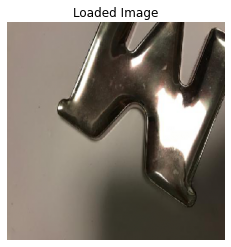

In [22]:
from keras.preprocessing import image
import numpy as np
test_img = './Data/Test/metal/metal363.jpg'
img = image.load_img(test_img, target_size = (300,300))
img = image.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [17]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 3.95 %
GLASS : 25.6 %
METAL : 25.78 %
PAPER : 6.12 %
PLASTIC : 14.37 %
TRASH : 24.17 %


Probability: 0.8330386
Classified: glass 



Text(0.5, 1.0, 'Loaded Image')

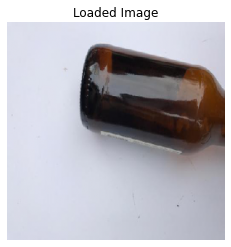

In [18]:
test_img = './Data/Test/glass/glass421.jpg'
img = image.load_img(test_img, target_size = (300,300))
img = image.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [19]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 1.26 %
GLASS : 83.3 %
METAL : 3.52 %
PAPER : 0.54 %
PLASTIC : 11.36 %
TRASH : 0.02 %


Probability: 0.8369513
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

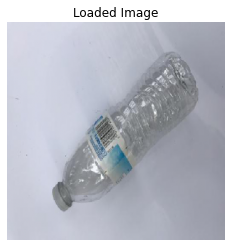

In [20]:
test_img = './Data/Test/plastic/plastic425.jpg'
img = image.load_img(test_img, target_size = (300,300))
img = image.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [21]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.26 %
GLASS : 5.29 %
METAL : 0.79 %
PAPER : 9.8 %
PLASTIC : 83.7 %
TRASH : 0.15 %


### *Testing shows that the model is fairly successful in classifying the type of waste*

## ***Saving model as 'model.h5'***

In [22]:
model.save('weights/model.h5')